- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using CairoMakie, ColorSchemes, Colors
include("makieTheme4.jl") # don't forget to include the theme. 

In [2]:
using Random
Random.seed!(123)
x = -3:0.05:3
y = exp.(-x.^2)
n=15
y[1:n] = y[1:n] .+ 0.02*randn(n);

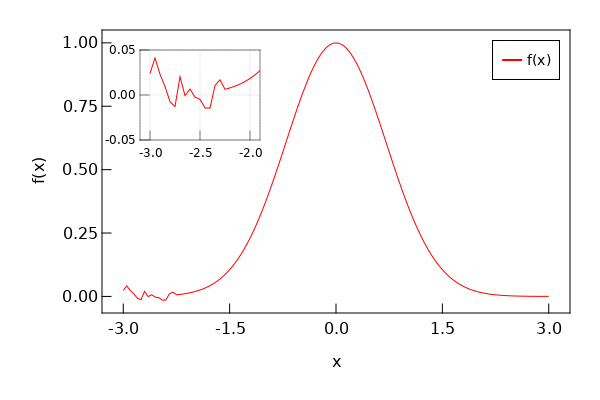

In [3]:
fig = Figure(resolution = (600, 400))
ax1 = Axis(fig, xlabel = "x", ylabel = "f(x)",
    xgridvisible = false, 
    ygridvisible = false)
ax2 = Axis(fig, bbox = BBox(140, 260, 260, 350),
    xticklabelsize = 12, yticklabelsize = 12,showgrid=false,
  #title = "inset  at (100, 300, 100, 200)"
)
line1 = lines!(ax1, x, y, color = :red)
# inset
lines!(ax2, x, y, color = :red)
limits!(ax2, -3.1,-1.9,-0.05,0.05)
ax2.yticks = [-0.05,0,0.05]
ax2.xticks = [-3,-2.5,-2]
leg = Legend(fig, [line1], ["f(x)"], halign = :right, valign = :top)

fig[1, 1] = ax1
fig[1, 1] = leg
save("./results/FigInset1.png", fig, px_per_unit = 1)

fig

In [4]:
x = y = -10:0.11:10
y1d =  sin.(x) ./ x 
# 3D heatmap
sinc2d(x,y) = sin.(sqrt.(x.^2 + y.^2))./sqrt.(x.^2+y.^2)
fxy = [sinc2d(x,y) for x in x, y in y];

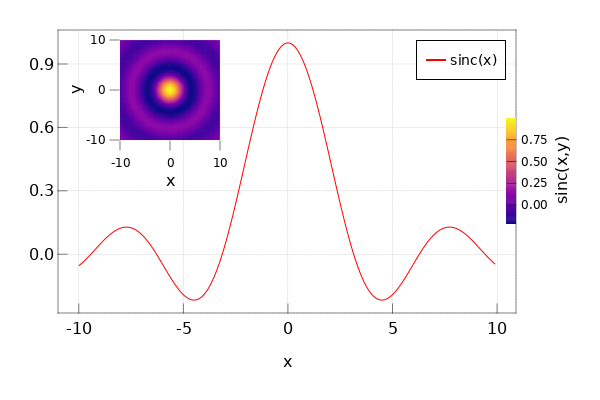

In [5]:
fig = Figure(resolution = (600, 400))
ax1 = Axis(fig, xlabel = "x", ylabel = "", xgridvisible = true, ygridvisible = true)
ax2 = Axis(fig,aspect=1, bbox = BBox(120, 220, 260, 360),
    xtickalign=0, ytickalign=0, xlabel = "x", ylabel = "y",
    ylabelpadding = 1, xlabelpadding=1, xticklabelsize = 12, yticklabelsize = 12
  #title = "inset  at (120, 220, 260, 360)"
)

line1 = lines!(ax1, x, y1d, color = :red)
# inset
hmap = heatmap!(ax2, x, y,fxy, colormap = :plasma)
limits!(ax2, -10,10,-10,10)
hidespines!(ax2)
ax2.yticks = [-10,0,10]
ax2.xticks = [-10,0,10]

leg = Legend(fig, [line1], ["sinc(x)"], halign = :right, valign = :top)
cbar = Colorbar(fig, hmap, label ="sinc(x,y)", labelpadding = 5, 
    tellheight = false, tellwidth = false,ticklabelsize = 12, 
    width = 10, height = Relative(1.5/4), halign = :right, valign = :center)

fig[1, 1] = ax1
fig[1, 1] = leg
fig[1, 1] = cbar
save("./results/FigInset2.png", fig, px_per_unit = 1)
fig

In [81]:
x = y = -10:0.11:10
y1d =  sin.(x) ./ x 
lower = y1d .- 0.1
upper = y1d .+ 0.1;

In [82]:
using AlgebraOfGraphics

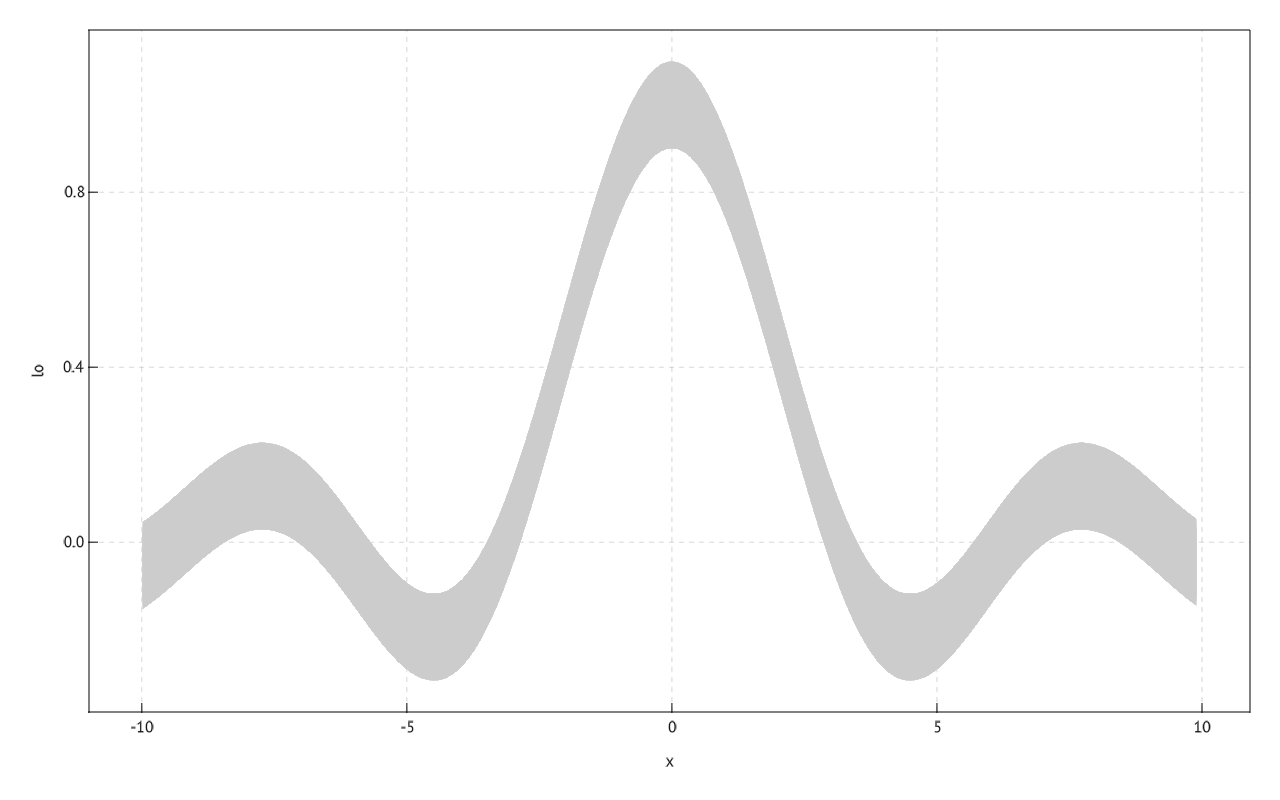

In [84]:
df = DataFrame(:x => x, :y => y1d, :lo => lower, :hi => upper)
dta = df |> data
cols = style(:x, :lo, :hi)
#grp = style(color = :grp)
geom = spec(Band, alpha = 0.2)

dta * cols * geom |> draw

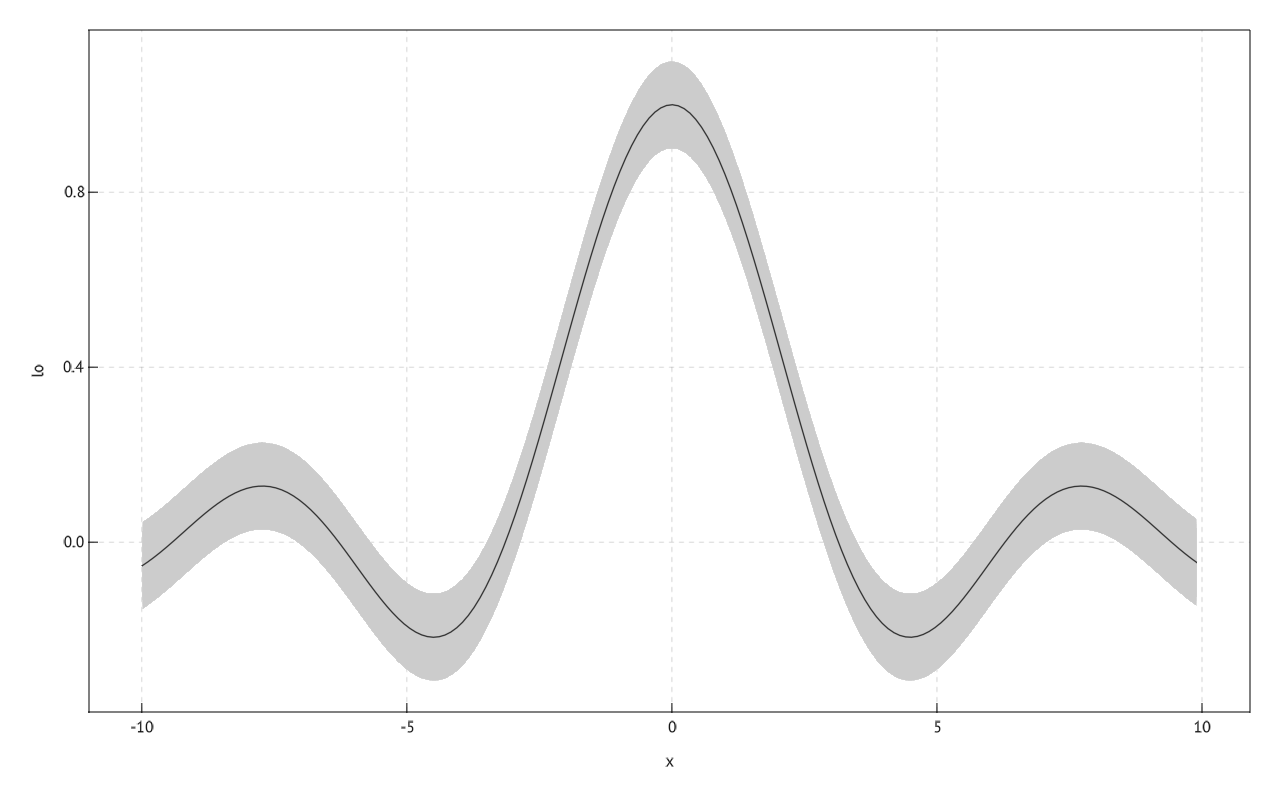

In [85]:
cols2 = style(:x, :y)
#grp = style(color = :grp)
geom2 = spec(Lines)

dta * (cols * geom + cols2 * geom2)  |> draw

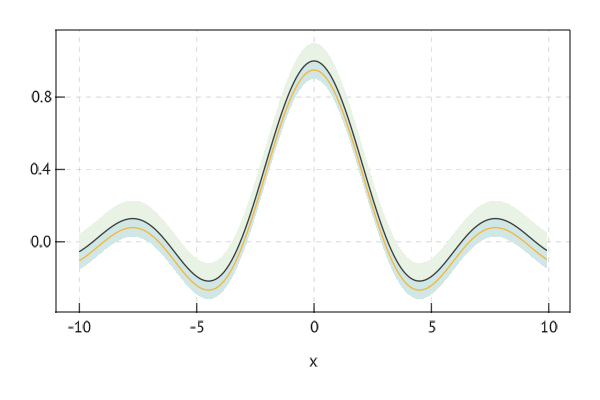

In [49]:
scene, layout = layoutscene(resolution = (600, 400))
ax1 = LAxis(scene, xlabel = "x", ylabel = "", xgridvisible = true, ygridvisible = true)
lines!(ax1, x, y1d, color = :black)
lines!(ax1, x, y1d .- 0.05, color = :orange)
fill_between!(x, lower, upper; scene = ax1, color = RGBAf0(0.1,0.5,0,0.1))
fill_between!(x, lower, upper.-0.1; scene = ax1, color = RGBAf0(0.,0.5,0.9,0.1))
layout[1,1] = ax1

scene

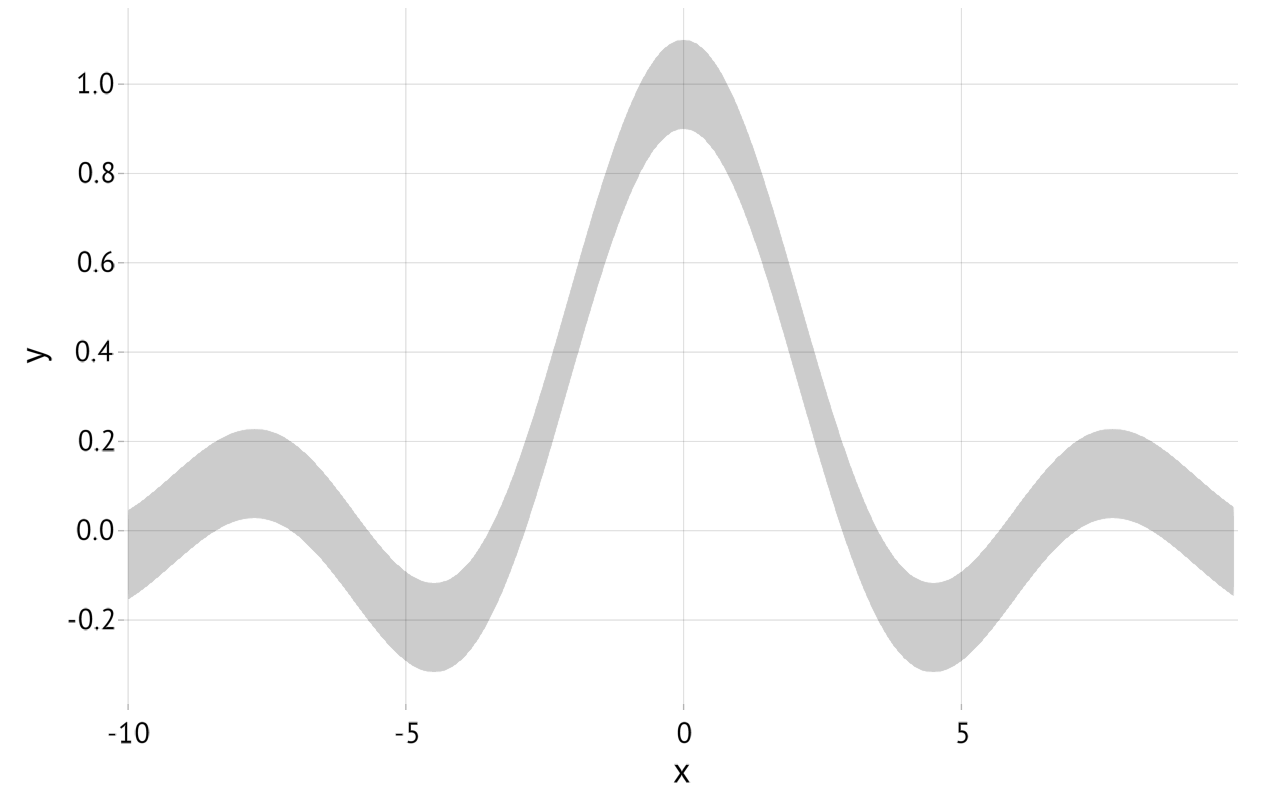

In [14]:
scene = Scene()
plot!(Band, x, lower, upper; colormap = RGBAf0(0.1,0.5,0,0.1))

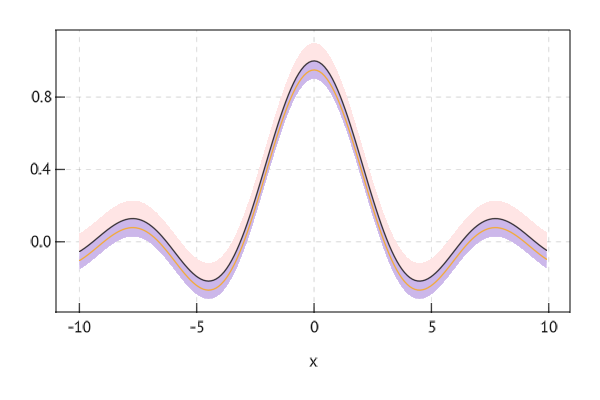

In [72]:
scene, layout = layoutscene(resolution = (600, 400))
ax1 = LAxis(scene, xlabel = "x", ylabel = "", xgridvisible = true, ygridvisible = true)
lines!(ax1, x, y1d, color = :black)
lines!(ax1, x, y1d .- 0.05, color = :orange)
band!(ax1, x, lower, upper; color = (:red, 0.1))
band!(ax1, x, lower, upper.-0.1; color = (:blue, 0.2))

layout[1,1] = ax1
scene